In [32]:
import numpy as np
import sys
sys.path.append("F:/MachineLearning/MachineLearn/ML_Notes-master/ML_Notes-master/")
from ml_models import utils
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
class LogisticRegression(object):
    def __init__(self, fit_intercept=True, solver='sgd', if_standard=True, l1_ratio=None, l2_ratio=None, epochs=10,
                 eta=None, batch_size=16):

        self.w = None
        self.fit_intercept = fit_intercept
        self.solver = solver
        self.if_standard = if_standard
        if if_standard:
            self.feature_mean = None
            self.feature_std = None
        self.epochs = epochs
        self.eta = eta
        self.batch_size = batch_size
        self.l1_ratio = l1_ratio
        self.l2_ratio = l2_ratio
        # 注册sign函数
        self.sign_func = np.vectorize(utils.sign)
        # 记录losses
        self.losses = []

    def init_params(self, n_features):
        """
        初始化参数
        :return:
        """
        self.w = np.random.random(size=(n_features, 1))

    def _fit_closed_form_solution(self, x, y):
        """
        直接求闭式解
        :param x:
        :param y:
        :return:
        """
        self._fit_sgd(x, y)

    def _fit_sgd(self, x, y):
        """
        随机梯度下降求解
        :param x:
        :param y:
        :return:
        """
        x_y = np.c_[x, y]
        print(x_y)
        count = 0
        for _ in range(self.epochs):
            np.random.shuffle(x_y)
            for index in range(x_y.shape[0] // self.batch_size):
                count += 1
                #下面三个变量都为一维
                batch_x_y = x_y[self.batch_size * index:self.batch_size * (index + 1)]
                batch_x = batch_x_y[:, :-1]
                batch_y = batch_x_y[:, -1:]
        
    
                dw = -1 * (batch_y - utils.sigmoid(batch_x.dot(self.w))).T.dot(batch_x) / self.batch_size
                dw = dw.T

                # 添加l1和l2的部分
                dw_reg = np.zeros(shape=(x.shape[1] - 1, 1))
                if self.l1_ratio is not None:
                    dw_reg += self.l1_ratio * self.sign_func(self.w[:-1]) / self.batch_size
                if self.l2_ratio is not None:
                    dw_reg += 2 * self.l2_ratio * self.w[:-1] / self.batch_size
                dw_reg = np.concatenate([dw_reg, np.asarray([[0]])], axis=0)

                dw += dw_reg
                self.w = self.w - self.eta * dw

            # 计算losses
            cost = -1 * np.sum(
                np.multiply(y, np.log(utils.sigmoid(x.dot(self.w)))) + np.multiply(1 - y, np.log(
                    1 - utils.sigmoid(x.dot(self.w)))))
            self.losses.append(cost) 

    def fit(self, x, y):
        """
        :param x: ndarray格式数据: m x n
        :param y: ndarray格式数据: m x 1
        :return:
        """
        y = y.reshape(x.shape[0], 1)
        # 是否归一化feature
        if self.if_standard:
            self.feature_mean = np.mean(x, axis=0)
            self.feature_std = np.std(x, axis=0) + 1e-8
            x = (x - self.feature_mean) / self.feature_std
        # 是否训练bias
        if self.fit_intercept:
            x = np.c_[x, np.ones_like(y)]
        # 初始化参数
        self.init_params(x.shape[1])
        # 更新eta
        if self.eta is None:
            self.eta = self.batch_size / np.sqrt(x.shape[0])

        if self.solver == 'closed_form':
            self._fit_closed_form_solution(x, y)
        elif self.solver == 'sgd':
            self._fit_sgd(x, y)

    def get_params(self):
        """
        输出原始的系数
        :return: w,b
        """
        if self.fit_intercept:
            w = self.w[:-1]
            b = self.w[-1]
        else:
            w = self.w
            b = 0
        if self.if_standard:
            w = w / self.feature_std.reshape(-1, 1)
            b = b - w.T.dot(self.feature_mean.reshape(-1, 1))
        return w.reshape(-1), b

    def predict_proba(self, x):
        """
        预测为y=1的概率
        :param x:ndarray格式数据: m x n
        :return: m x 1
        """
        if self.if_standard:
            x = (x - self.feature_mean) / self.feature_std
        if self.fit_intercept:
            x = np.c_[x, np.ones(x.shape[0])]
        return utils.sigmoid(x.dot(self.w))

    def predict(self, x):
        """
        预测类别，默认大于0.5的为1，小于0.5的为0
        :param x:
        :return:
        """
        proba = self.predict_proba(x)
        return (proba > 0.5).astype(int)

    def plot_decision_boundary(self, x, y):
        """
        绘制前两个维度的决策边界
        :param x:
        :param y:
        :return:
        """
        y = y.reshape(-1)
        weights, bias = self.get_params()
        w1 = weights[0]
        w2 = weights[1]
        bias = bias[0][0]
        x1 = np.arange(np.min(x), np.max(x), 0.1)
        x2 = -w1 / w2 * x1 - bias / w2
        plt.scatter(x[:, 0], x[:, 1], c=y, s=50)
        plt.plot(x1, x2, 'r')
        plt.show()

    def plot_losses(self):
        plt.plot(range(0, len(self.losses)), self.losses)
        plt.show()

In [90]:
def plot_losses(self):
    plt.plot(range(0,len(self.losses)),self.losses)
    plt.show()

In [94]:
from sklearn.datasets import make_classification
data,target=make_classification(n_samples=200, n_features=3,n_classes=2,n_informative=1,n_redundant=0,n_repeated=0,n_clusters_per_class=1)

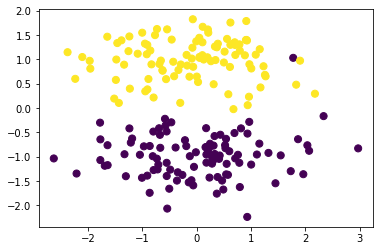

In [95]:
plt.scatter(data[:, 0], data[:, 1],c=target,s=50)

In [100]:
lr = LogisticRegression()
lr.fit(data,target)

[[ 0.34582446 -0.99730467 -1.37351412  1.          0.        ]
 [-0.80684737  1.09785642  0.52265569  1.          1.        ]
 [ 0.09701221  0.97548961  2.09283222  1.          1.        ]
 [ 0.28149155 -1.31924877  0.53152339  1.          0.        ]
 [-1.59376664 -0.70336082  0.06583709  1.          0.        ]
 [ 0.41605637 -1.62493119 -1.17300131  1.          0.        ]
 [ 0.15646978  1.54934657  0.22967743  1.          1.        ]
 [ 0.25544578 -0.827492    0.72392902  1.          0.        ]
 [ 0.74493169  1.25406777  2.0864339   1.          1.        ]
 [ 0.59682288 -1.05820201  1.49952439  1.          0.        ]
 [-0.52623522 -0.32826453 -0.58139866  1.          0.        ]
 [ 0.48118203 -0.50470757  0.39866248  1.          0.        ]
 [-1.18307766  0.37250085 -0.57772445  1.          1.        ]
 [-0.58435061  0.7249009   1.82351184  1.          1.        ]
 [ 1.77548771 -1.19734633  0.0971233   1.          0.        ]
 [ 0.35767172  0.45638207 -0.22149118  1.          1.  

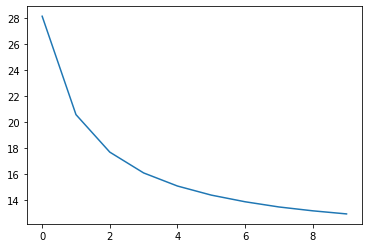

In [97]:
lr.plot_losses()

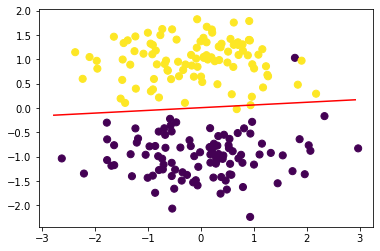

In [99]:
lr.plot_decision_boundary(data,target)